In [2]:
#Import Library yang dibutuhkan
import pandas as pd 
import string
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
import joblib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('Data_Train.csv')
df_train.shape

(9350, 7)

### Sebelum StopWord

In [4]:
text_train = " ".join(str(t) for t in df_train['full_text'].dropna())

#### WordCloud Data Latih

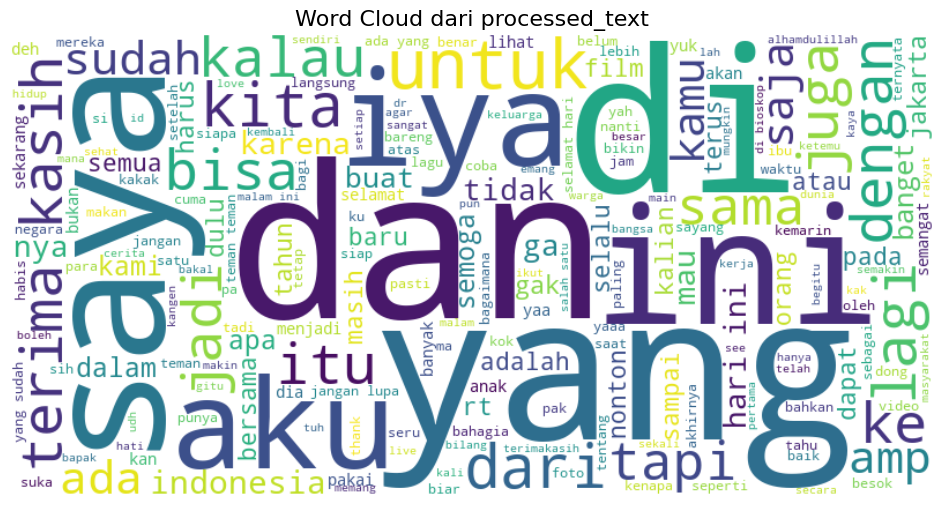

In [5]:
# 3. Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_train)

# 4. Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari processed_text', fontsize=16)
plt.show()

### Remove StopWord

In [6]:
def tokenize(text):
    tokens = text.split()

    return tokens


In [7]:
# Terapkan ke kolom full_text
df_train['tokenized'] = df_train['full_text'].apply(tokenize)

In [9]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Stopword bawaan Sastrawi
stop_factory = StopWordRemoverFactory()
stopword_sastrawi = set(stop_factory.get_stop_words())

# Stopword tambahan dari file
with open("StopWordKostum.txt", "r", encoding="utf-8") as f:
    extra_stopwords = set(f.read().splitlines())

# Gabungkan semua stopword
custom_stopwords = stopword_sastrawi.union(extra_stopwords)

# Fungsi hapus stopword dari token
def remove_stopwords(tokens):
    return [word for word in tokens if word not in custom_stopwords]

In [10]:
# Terapkan ke token hasil sebelumnya
df_train['no_stopwords'] = df_train['tokenized'].apply(remove_stopwords)

In [11]:
df_train['processed_text'] = df_train['no_stopwords'].apply(lambda tokens: ' '.join(tokens))

## Word Cloud Setelah StopWord

In [12]:
text_train = " ".join(str(t) for t in df_train['processed_text'].dropna())

### Data Train

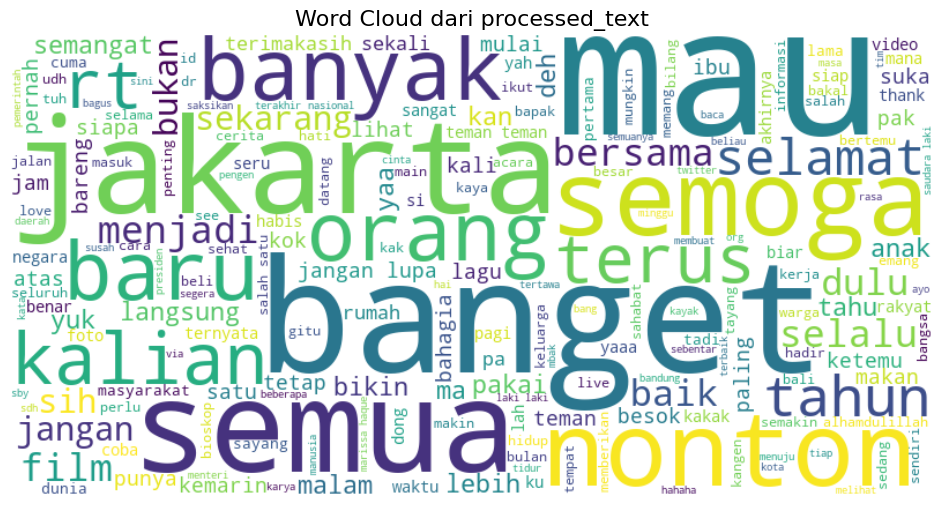

In [13]:
# 3. Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_train)

# 4. Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari processed_text', fontsize=16)
plt.show()

In [14]:
columns_to_drop = ['tokenized', 'no_stopwords','full_text']
df_train.drop(columns=columns_to_drop, inplace=True)


In [15]:
df_train.rename(columns={'processed_text': 'full_text'}, inplace=True)

In [16]:
df_train.head()

,username,MBTI,IE,NS,TF,JP,full_text
0,DylanSahara,ENFJ,E,N,F,J,about my wedding makeup kali makeup resepsi by...
1,DylanSahara,ENFJ,E,N,F,J,bapak prabowo subianto berkenan hadir memberi
2,DylanSahara,ENFJ,E,N,F,J,halo calon suami hahahaha
3,DylanSahara,ENFJ,E,N,F,J,muka dicoretcoret pakai kostum kayak orang gil...
4,DylanSahara,ENFJ,E,N,F,J,muka cakep dicemongcemongin


In [17]:
df_train.isna().sum()

username     0
MBTI         0
IE           0
NS           0
TF           0
JP           0
full_text    0
dtype: int64

In [18]:
df_train.to_csv('DataLatih_NoStopWord.csv', index=False)